In [1]:
import requests
import re
from bs4 import BeautifulSoup as BS
from IPython.core.display import HTML
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read in Data

In [2]:
movie = pd.read_csv("../Data/IMDb_Movies.csv")

In [3]:
score = pd.read_csv("../Data/IMDb_Score.csv")

In [4]:
rt = pd.read_csv("../Data/Rotten_Tomatoes.csv")

### Movie and RT combined

In [5]:
m_rt = movie.merge(rt, how = 'outer', on = 'Title_ID')
m_rt.head()

,Title_ID,Title,Director,Rating,Genre,Runtime,Release_Year,Award_Noms,Award_Wins,Score_ID,Tomatometer,RT_Audience_Score,RT_Critic_Reviews,RT_Audience_Reviews,US_Box_Office,Distributor,Original_Language,RT_All_Pct
0,17761,The Shawshank Redemption,Frank Darabont,R,Drama,142,1994,43,21,7041,91,98,82,250k+,$27.3M,Columbia Pictures,English,94.5
1,17762,The Godfather,Francis Ford Coppola,R,"Crime, Drama",175,1972,30,32,7042,97,98,149,250k+,$134.8M,Paramount Pictures,English,97.5
2,17763,The Dark Knight,Christopher Nolan,PG-13,"Action, Crime, Drama",152,2008,163,160,7043,94,94,345,250k+,$2.0M,Warner Bros.,English,94.0
3,17764,The Godfather Part II,Francis Ford Coppola,R,"Crime, Drama",202,1974,21,17,7044,96,97,123,250k+,Not Available,Paramount Pictures,English,96.5
4,17765,12 Angry Men,Sidney Lumet,Approved,"Crime, Drama",96,1957,13,17,7045,100,97,58,100k+,Not Available,"Criterion Collection, MGM/UA Home Entertainmen...",English,98.5


### Movie and Score Combined

In [6]:
m_s = movie.merge(score, how = 'outer', on = 'Score_ID')
m_s.head()

,Title_ID,Title,Director,Rating,Genre,Runtime,Release_Year,Award_Noms,Award_Wins,Score_ID,IMDb_Score,Audience_Reviews,US_Users,Non_US_Users,Male_Reviews,Female_Reviews,Male_Score,Female_Score,IMDb_Score_Pct
0,17761,The Shawshank Redemption,Frank Darabont,R,Drama,142,1994,43,21,7041,9.3,2666904,566032,1672983,1475251,294889,9.3,9.2,93
1,17762,The Godfather,Francis Ford Coppola,R,"Crime, Drama",175,1972,30,32,7042,9.2,1848055,417566,1161734,1072921,166441,9.2,8.9,92
2,17763,The Dark Knight,Christopher Nolan,PG-13,"Action, Crime, Drama",152,2008,163,160,7043,9.0,2639814,621027,1646769,1490958,267216,9.0,8.7,90
3,17764,The Godfather Part II,Francis Ford Coppola,R,"Crime, Drama",202,1974,21,17,7044,9.0,1265636,282291,805848,759883,105690,9.0,8.7,90
4,17765,12 Angry Men,Sidney Lumet,Approved,"Crime, Drama",96,1957,13,17,7045,9.0,787589,187528,509017,453568,76860,9.0,8.9,90


### Movie, Score, and RT in One DataFrame

In [7]:
all_df = m_rt.merge(score, how = "left", on = "Score_ID")
all_df.head()

,Title_ID,Title,Director,Rating,Genre,Runtime,Release_Year,Award_Noms,Award_Wins,Score_ID,...,RT_All_Pct,IMDb_Score,Audience_Reviews,US_Users,Non_US_Users,Male_Reviews,Female_Reviews,Male_Score,Female_Score,IMDb_Score_Pct
0,17761,The Shawshank Redemption,Frank Darabont,R,Drama,142,1994,43,21,7041,...,94.5,9.3,2666904,566032,1672983,1475251,294889,9.3,9.2,93
1,17762,The Godfather,Francis Ford Coppola,R,"Crime, Drama",175,1972,30,32,7042,...,97.5,9.2,1848055,417566,1161734,1072921,166441,9.2,8.9,92
2,17763,The Dark Knight,Christopher Nolan,PG-13,"Action, Crime, Drama",152,2008,163,160,7043,...,94.0,9.0,2639814,621027,1646769,1490958,267216,9.0,8.7,90
3,17764,The Godfather Part II,Francis Ford Coppola,R,"Crime, Drama",202,1974,21,17,7044,...,96.5,9.0,1265636,282291,805848,759883,105690,9.0,8.7,90
4,17765,12 Angry Men,Sidney Lumet,Approved,"Crime, Drama",96,1957,13,17,7045,...,98.5,9.0,787589,187528,509017,453568,76860,9.0,8.9,90


# How do the Top 250 Movies by IMDb compare to Rotten Tomatoes?

## Question 1: What is the average rating by genre for both IMDb and Rotten Tomatoes?

## Question 2: Which movies won the most awards?

In [8]:
movie_award = all_df[['Title','RT_All_Pct','IMDb_Score_Pct','Award_Noms', 'Award_Wins']].nlargest(10, 'Award_Wins')
movie_award

,Title,RT_All_Pct,IMDb_Score_Pct,Award_Noms,Award_Wins
33,Parasite,94.5,85,271,308
199,Mad Max: Fury Road,91.5,81,234,247
179,12 Years a Slave,92.5,81,337,242
6,The Lord of the Rings: The Return of the King,89.5,90,124,209
151,No Country for Old Men,89.5,82,140,164
2,The Dark Knight,94.0,90,163,160
13,Inception,89.0,88,220,158
186,The Grand Budapest Hotel,89.0,81,227,136
122,1917,88.5,82,206,135
72,Inglourious Basterds,88.5,83,172,134


ANSWER: <br>
1. Parasite <br>
2. Mad Max: Fury Road <br>
3. 12 Years a Slave <br>
4. LOTR: The Return of the King <br>
5. No Country for Old Men <br>
6. The Dark Knight <br>
7. Inception <br>
8. The Grand Budapest Hotel <br>
9. 1917 <br>
10. Inglourious Basterds <br>

## Did they receive a high rating on IMDb? What about Rotten Tomatoes?

IMDb: LOTR, Dark Knight, and Inception rated higher on IMDb over the Parasite <br>
RT_Aud: 12 Years a Slave received the same rating as Parasite, but Dark Knight and Inception have a higher rating <br>
RT_Crit: Parasite was the fan favorite of critics

In [9]:
movie_award['Title'] = movie_award['Title'].replace('The Lord of the Rings: The Return of the King', 'LOTR: Return of the King')

### <font color='royalblue'> Visual (Question 2) </font>

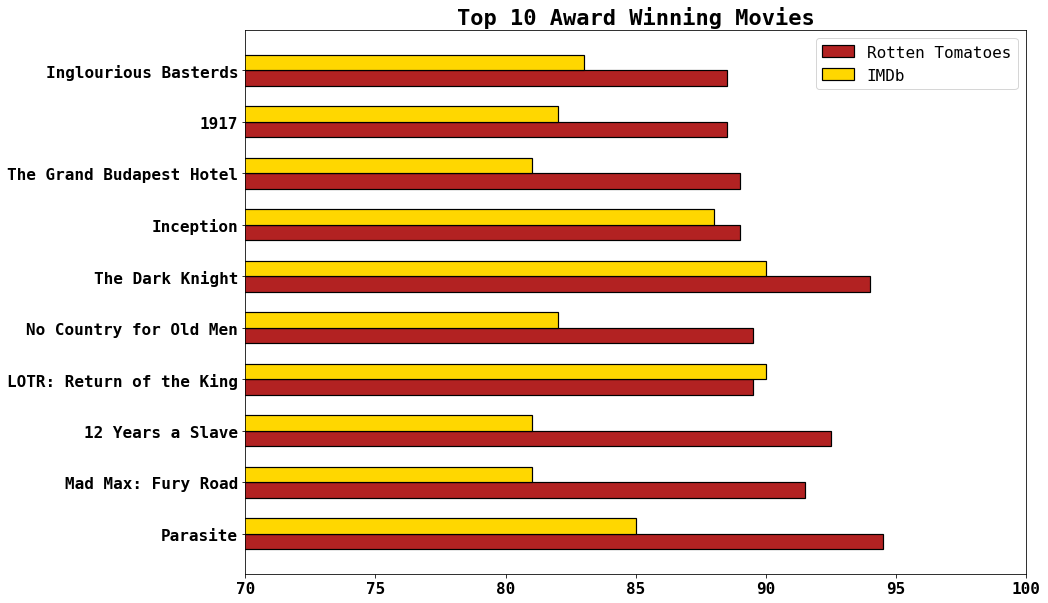

In [10]:
# set the font globally
plt.rcParams.update({'font.family':'monospace'})

# Create the y value and bar width 
y = np.arange(len(movie_award['Title']))
width = 0.30

# Define plot size
plt.rcParams['figure.figsize'] = [14, 10]

# Plot the x and y values
fig,ax = plt.subplots()
bar1 = ax.barh(y-width/2, movie_award['RT_All_Pct'], width, color = 'firebrick', edgecolor = 'black', linewidth = 1.2)
bar2 = ax.barh(y+width/2, movie_award['IMDb_Score_Pct'], width, color = 'gold', edgecolor = 'black', linewidth = 1.2)
 
# Set the y labels and legends
ax.set_yticks(y)
ax.set_yticklabels(movie_award['Title'], weight = 'bold', size = '16')
ax.legend

# Set the x labels
ax.set_xlim(70, 100)
ax.set_xticks([70,75,80,85,90,95,100])
ax.set_xticklabels(['70','75','80','85','90','95','100'], weight = 'bold', size = '16')

#title 
ax.set_title('Top 10 Award Winning Movies', weight = 'bold', size = '22')

#Clustered Bar legend
plt.legend(["Rotten Tomatoes", "IMDb"], ncol=1, loc="upper left", bbox_to_anchor= (.72,1), fontsize = '16');

## Question 3: For non-English movies, which group, US or non-US Users, tended to leave more reviews?

#### How many of the movies' original language was not English?

In [11]:
not_eng = all_df.loc[(all_df['Original_Language'] != 'English') & (all_df['Original_Language'] != "English (United Kingdom)")]

#combining the same languages
not_eng['Original_Language'] = not_eng['Original_Language'].replace('French (Canada)', 'French').replace('French (France)', 'French')
not_eng['Original_Language'] = not_eng['Original_Language'].replace('Spanish (Spain)', 'Spanish').replace('Portuguese (Brazil)','Portuguese')

C:\Users\hanna\AppData\Local\Temp\ipykernel_16388\1790568667.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_eng['Original_Language'] = not_eng['Original_Language'].replace('French (Canada)', 'French').replace('French (France)', 'French')
C:\Users\hanna\AppData\Local\Temp\ipykernel_16388\1790568667.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_eng['Original_Language'] = not_eng['Original_Language'].replace('Spanish (Spain)', 'Spanish').replace('Portuguese (Brazil)','Portuguese')


In [12]:
lang_count = pd.DataFrame(not_eng['Original_Language'].value_counts())
lang_count.reset_index(inplace=True)
language = lang_count.rename(columns = {'index':'Original Language','Original_Language':'Total Movies'})

#print
language

,Original Language,Total Movies
0,Japanese,14
1,French,6
2,Italian,5
3,German,5
4,Korean,4
5,Not Available,3
6,Hindi,3
7,Spanish,3
8,Swedish,3
9,Arabic,2


### <font color='royalblue'> Visual (Question 3.a) </font>

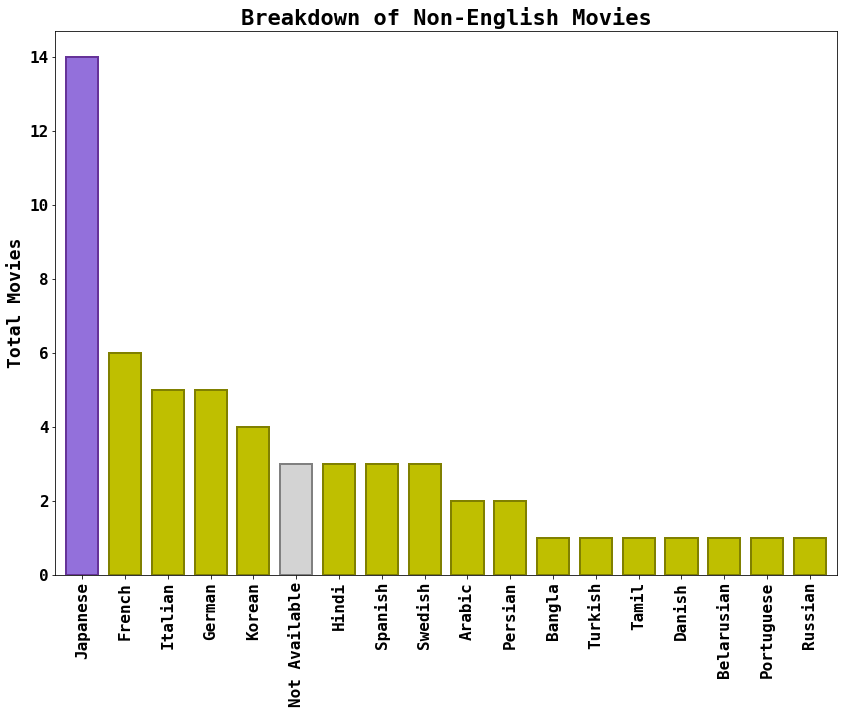

In [13]:
# set the font globally
plt.rcParams.update({'font.family':'monospace'})

#bold
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

#bar chart
ax = language.plot(x='Original Language', y='Total Movies', kind = 'bar', 
    color = ['mediumpurple','y','y','y','y','lightgray','y','y','y','y','y','y','y','y','y','y','y','y','y','y'],
    edgecolor = ['rebeccapurple','olive','olive','olive','olive','gray','olive','olive','olive','olive','olive','olive','olive','olive','olive','olive','olive','olive','olive','olive'],
    linewidth = 2, legend = False, fontsize = 16, width = .75)

#removing x label and adding y label
plt.xlabel('')
plt.ylabel('Total Movies', size = '18')

#title
plt.title("Breakdown of Non-English Movies", weight = 'bold', size = 22);

#### What percent of all the movies are English?

In [14]:
lang_count = pd.DataFrame(all_df['Original_Language'].value_counts())
lang_count.reset_index(inplace=True)
other = lang_count.rename(columns = {'index':'Original Language','Original_Language':'Total Movies'})
other

#changing string values to make a pie chart
other['Original Language'] = other['Original Language'].replace('English (United Kingdom)', 'English')
other['Original Language'] = other['Original Language'].replace('Japanese', 'Other').replace('German', 'Other')
other['Original Language'] = other['Original Language'].replace('Italian', 'Other').replace('Korean', 'Other').replace('French (France)', 'Other')
other['Original Language'] = other['Original Language'].replace('Hindi', 'Other').replace('Swedish', 'Other').replace('Spanish', 'Other')
other['Original Language'] = other['Original Language'].replace('Arabic', 'Other').replace('French (Canada)', 'Other').replace('Persian', 'Other')
other['Original Language'] = other['Original Language'].replace('Tamil', 'Other').replace('Spanish (Spain)', 'Other').replace('Danish', 'Other')
other['Original Language'] = other['Original Language'].replace('Portuguese (Brazil)', 'Other').replace('Russian', 'Other')
other['Original Language'] = other['Original Language'].replace('Turkish', 'Other').replace('Belarusian', 'Other').replace('Bangla', 'Other')

group = other.groupby(by='Original Language').sum()
df_group = pd.DataFrame(group.reset_index())
df_group['Percent'] = round((df_group['Total Movies']/df_group['Total Movies'].sum())*100,2)
df_group

,Original Language,Total Movies,Percent
0,English,193,77.2
1,Not Available,3,1.2
2,Other,54,21.6


### <font color='royalblue'> Visual (Question 3.b) </font>

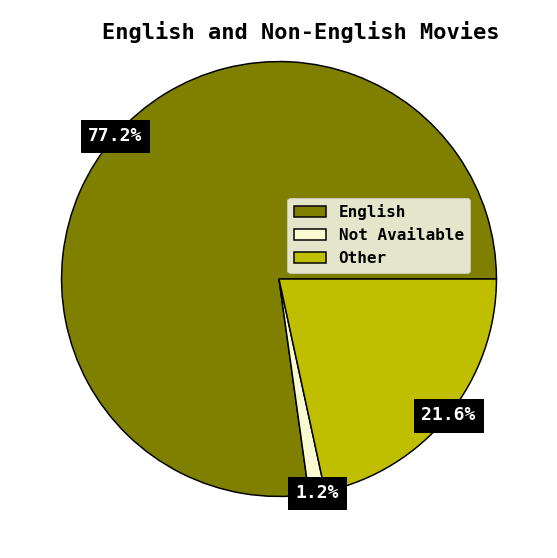

In [15]:
# set the font globally
plt.rcParams.update({'font.family':'monospace'})

#bold
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

#pie chart
df_group.plot(x='Original Language', y='Total Movies', kind = 'pie', 
              colors = ['olive','lightgoldenrodyellow','y'],
              labels = ('','',''), autopct='%1.1f%%', pctdistance = 1,
              textprops = {'backgroundcolor':'black', 'color':'white'}, fontsize = 18,
              wedgeprops = {"edgecolor" : "black",'linewidth': 1.5,'antialiased': True})

#textprops documentation
#https://matplotlib.org/stable/tutorials/text/text_props.html

#legend
labels = df_group['Original Language']
plt.legend(labels, bbox_to_anchor=(.71,.5),loc = 'lower right', fontsize=16, bbox_transform=plt.gcf().transFigure)

#removing y label
plt.ylabel('')

#title
plt.title("English and Non-English Movies", weight = 'bold', size = 22, x = .54, y = .93);

In [116]:
movie_award

,Title,RT_All_Pct,IMDb_Score_Pct,Award_Noms,Award_Wins
33,Parasite,94.5,85,271,308
199,Mad Max: Fury Road,91.5,81,234,247
179,12 Years a Slave,92.5,81,337,242
6,LOTR: Return of the King,89.5,90,124,209
151,No Country for Old Men,89.5,82,140,164
2,The Dark Knight,94.0,90,163,160
13,Inception,89.0,88,220,158
186,The Grand Budapest Hotel,89.0,81,227,136
122,1917,88.5,82,206,135
72,Inglourious Basterds,88.5,83,172,134


In [135]:
all_lang = all_df.loc[(all_df['Original_Language'] != 'Not Available')]

#combining the same languages
all_lang['Original_Language'] = all_lang['Original_Language'].replace('French (Canada)', 'French').replace('French (France)', 'French')
all_lang['Original_Language'] = all_lang['Original_Language'].replace('Spanish (Spain)', 'Spanish').replace('Portuguese (Brazil)','Portuguese')
all_lang['Original_Language'] = all_lang['Original_Language'].replace('English (United Kingdom)', 'English')

C:\Users\hanna\AppData\Local\Temp\ipykernel_16388\1971610707.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_lang['Original_Language'] = all_lang['Original_Language'].replace('French (Canada)', 'French').replace('French (France)', 'French')
C:\Users\hanna\AppData\Local\Temp\ipykernel_16388\1971610707.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_lang['Original_Language'] = all_lang['Original_Language'].replace('Spanish (Spain)', 'Spanish').replace('Portuguese (Brazil)','Portuguese')
C:\Use

In [138]:
#creating my sub table
all_lang2 = all_lang.groupby('Original_Language')['RT_All_Pct','IMDb_Score_Pct'].mean()
all_lang2.reset_index(inplace=True)

#rounding percents
all_lang2['Avg_RT_Pct'] = round(all_lang2['RT_All_Pct'],1)
all_lang2['Avg_IMDb_Pct'] = round(all_lang2['IMDb_Score_Pct'],1)

#getting rid of the now unnecessary columns
all_lang2.pop('RT_All_Pct')
all_lang2.pop('IMDb_Score_Pct')

#print
all_lang2

C:\Users\hanna\AppData\Local\Temp\ipykernel_16388\1846313851.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  all_lang2 = all_lang.groupby('Original_Language')['RT_All_Pct','IMDb_Score_Pct'].mean()


,Original_Language,Avg_RT_Pct,Avg_IMDb_Pct
0,Arabic,94.2,82.5
1,Bangla,95.5,83.0
2,Belarusian,96.0,84.0
3,Danish,92.5,83.0
4,English,90.9,83.1
5,French,93.2,82.5
6,German,95.0,83.2
7,Hindi,93.7,83.7
8,Italian,93.3,84.2
9,Japanese,92.4,83.5


### <font color='royalblue'> Visual (Question 3.c) </font>

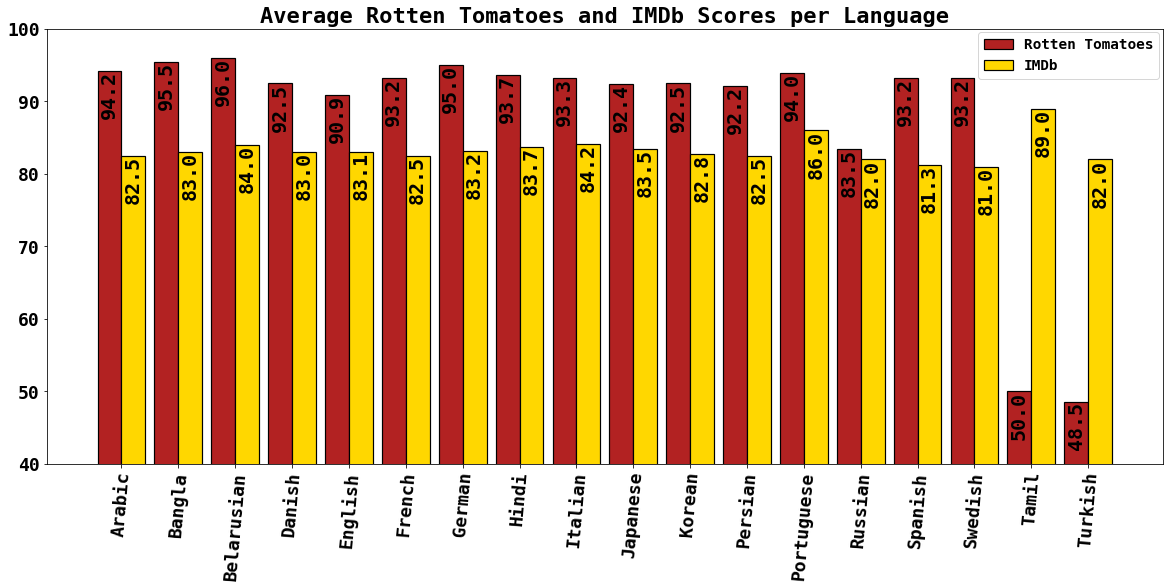

In [299]:
# set the font globally
plt.rcParams.update({'font.family':'monospace'})

# Create the y value and bar width 
x = np.arange(len(all_lang2['Original_Language']))
width = 0.42

# Define plot size
plt.rcParams['figure.figsize'] = [20, 8]

# Plot the x and y values
fig,ax = plt.subplots()
bar1 = ax.bar(x-width/2, all_lang2['Avg_RT_Pct'], width, color = 'firebrick', edgecolor = 'black', linewidth = 1.2)
bar2 = ax.bar(x+width/2, all_lang2['Avg_IMDb_Pct'], width, color = 'gold', edgecolor = 'black', linewidth = 1.2)
 
# label values for bars
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.text.html
for bar in ax.patches:
    bar_value = bar.get_height() # The text annotation for each bar should be its height.
    text = f'{bar_value:,}'   # Format the text with commas to separate thousands. 
    text_x = bar.get_x() + bar.get_width() / 2 # This will give the middle of each bar on the x-axis.
    # get_y() is where the bar starts so we add the height to it.
    text_y = bar.get_y() + bar_value
    # If we want the text to be the same color as the bar, we can get the color like so:
    bar_color = bar.get_facecolor()
    # If you want a consistent color, you can just set it as a constant, e.g. #222222
    ax.text(text_x, text_y, text, ha='center', va='top', 
            color='black',size=20,rotation = 90)
    
# Set the x labels and legends
ax.set_xticks(x)
ax.set_xticklabels(all_lang2['Original_Language'], weight = 'bold', size = '18', rotation = 85)
ax.legend

# Set the y labels
ax.set_ylim(40,100)
ax.set_yticks([40,50,60,70,80,90,100])
ax.set_yticklabels(['40','50','60','70','80','90','100'], weight = 'bold', size = '18')

#title 
ax.set_title('Average Rotten Tomatoes and IMDb Scores per Language', weight = 'bold', size = '22')

#Clustered Bar legend
plt.legend(["Rotten Tomatoes", "IMDb"], ncol=1, loc="upper left", bbox_to_anchor= (.828,1.009), fontsize = '14.4');

In [16]:
not_eng1 = not_eng.loc[(not_eng['Original_Language'] != 'Not Available')]
scat = not_eng1[['Original_Language','US_Users','Non_US_Users']]

### <font color='royalblue'> Visual (Question 3) </font>

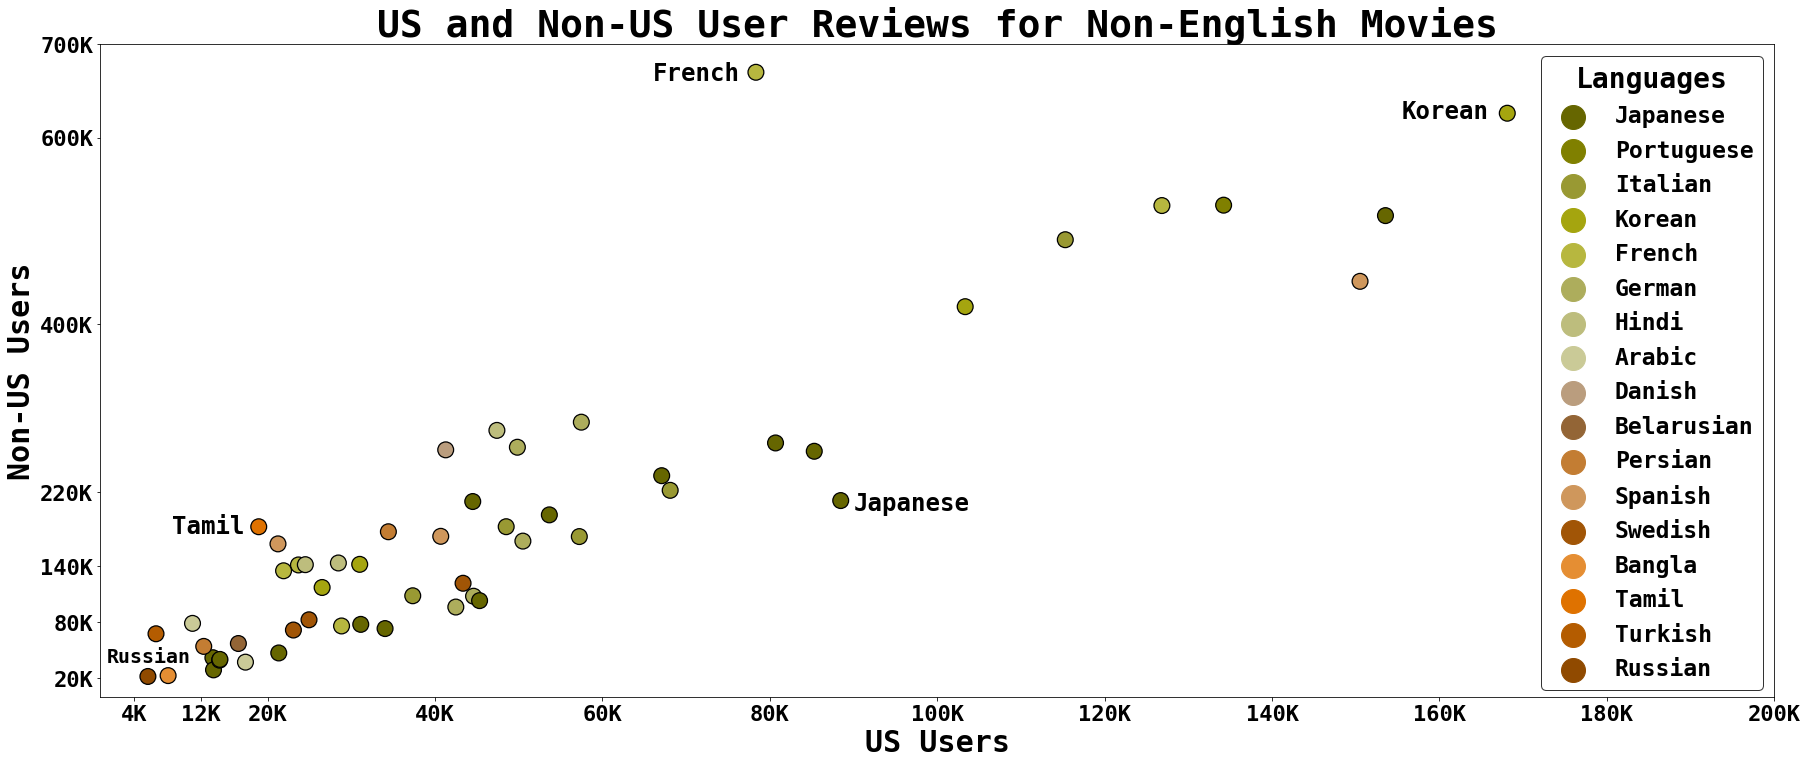

In [111]:
# Hex colors
# https://www.htmlcsscolor.com/hex/A15506

custom_palette = ['#666600','#808000','#999933','#A5A50F',
                  '#B7B73F','#ADAD5C','#BDBD7D','#CACA97',
                  '#BA9D7E','#936536','#C37D33','#CF975C',
                  '#A15506','#E58E33','#DF7200','#B45C00','#904A00']

# Define plot size
plt.rcParams['figure.figsize'] = [30, 12]

# scatterplot
fig, ax = plt.subplots()
ax = sns.scatterplot(x='US_Users', y = 'Non_US_Users', data = scat, hue = 'Original_Language', 
                    palette = custom_palette, s=250, edgecolor = 'black')

# x labels
plt.xlabel('US Users', size = '30')

ax.set_xlim(0, 200000)
ax.set_xticks([4000,12000,20000,40000,60000,80000,100000,120000,140000,160000,180000,200000])
ax.set_xticklabels(['4K','12K','20K','40K','60K','80K','100K','120K','140K','160K','180K','200K'], size = '22')

# y labels
plt.ylabel('Non-US Users', size = '30')

ax.set_ylim(0, 700000)
ax.set_yticks([20000,80000,140000,220000,400000,600000,700000])
ax.set_yticklabels(['20K','80K','140K','220K','400K','600K','700K'], size = '22')

# legend
plt.legend(title = 'Languages', title_fontsize = 28, fontsize=23, markerscale = 4, edgecolor = 'black')

# title
plt.title("US and Non-US User Reviews for Non-English Movies", weight = 'bold', size = 38)

#specific labels
plt.text(x=155500, y=620500, s='Korean', size = 24)
plt.text(x=66000, y=661200, s='French', size = 24)
plt.text(x=800, y=37500, s='Russian', size = 20)
plt.text(x=90000, y=200000, s='Japanese', size = 24)
plt.text(x=8550, y=175250, s='Tamil', size = 24);

French: The Intouchables <br>
Korean: Parasite <br>
Japanese: Seven Samurai <br>
Tamil: Jai Bhim <br>
Russian: Dersu Uzala <br>

# Further Analysis

## Question 4: What is the most prevalent genre?

## Question 5: What is the average length of the movies?

#### The longest movie?

#### The shortest movie?

## Question 6: What is the average movie rating?

## Question 7: What percentage of movies were "approved" with the Hayes Coded compared to newer movies with the MPAA modern rating system?

## Question 8: What is the range of years of the movies in the Top 250 List?

#### Are there outliers?

#### What decade were most films released in?

## Question 9: Which directors appear more than once?

## Question 10: What is the average difference between critics' scores and audiences' scores on Rotten Tomotatoes?

## Question 11: How do US-reviewers compare to non-US reviewers on IMDb?

#### Who tends to write more reviews?

#### What is the average scores between the two?

#### What genre interests US-reviewers more? What about non-US reviewers?

NOTE: important to note that the term US and non-US is based on the country the reviewer left the review...does not necessarily indicate that reviewers' citizenship

## Question 12: How many movies are a part of the same cinematic "universe"?

## Question 13: Do the movies on the Top 250 List tend to be nominated for several awards (i.e., more than 5)?

## Question 14: Which distributor has been a part of the most movies in the Top 250 Movie List?

# Potential Code for genres later on

code for font colors

In [19]:
### <font color='royalblue'> Visual (Question 2) </font>

see all columns

In [103]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
all_df

,Title_ID,Title,Director,Rating,Genre,Runtime,Release_Year,Award_Noms,Award_Wins,Score_ID,Tomatometer,RT_Audience_Score,RT_Critic_Reviews,RT_Audience_Reviews,US_Box_Office,Distributor,Original_Language,RT_All_Pct,IMDb_Score,Audience_Reviews,US_Users,Non_US_Users,Male_Reviews,Female_Reviews,Male_Score,Female_Score,IMDb_Score_Pct
0,17761,The Shawshank Redemption,Frank Darabont,R,Drama,142,1994,43,21,7041,91,98,82,250k+,$27.3M,Columbia Pictures,English,94.5,9.3,2666904,566032,1672983,1475251,294889,9.3,9.2,93
1,17762,The Godfather,Francis Ford Coppola,R,"Crime, Drama",175,1972,30,32,7042,97,98,149,250k+,$134.8M,Paramount Pictures,English,97.5,9.2,1848055,417566,1161734,1072921,166441,9.2,8.9,92
2,17763,The Dark Knight,Christopher Nolan,PG-13,"Action, Crime, Drama",152,2008,163,160,7043,94,94,345,250k+,$2.0M,Warner Bros.,English,94.0,9.0,2639814,621027,1646769,1490958,267216,9.0,8.7,90
3,17764,The Godfather Part II,Francis Ford Coppola,R,"Crime, Drama",202,1974,21,17,7044,96,97,123,250k+,Not Available,Paramount Pictures,English,96.5,9.0,1265636,282291,805848,759883,105690,9.0,8.7,90
4,17765,12 Angry Men,Sidney Lumet,Approved,"Crime, Drama",96,1957,13,17,7045,100,97,58,100k+,Not Available,"Criterion Collection, MGM/UA Home Entertainmen...",English,98.5,9.0,787589,187528,509017,453568,76860,9.0,8.9,90
5,17766,Schindler's List,Steven Spielberg,R,"Biography, Drama, History",195,1993,49,91,7046,98,97,130,250k+,$96.6M,Universal Pictures,English,97.5,9.0,1350290,291447,865722,758414,171042,9.0,9.0,90
6,17767,The Lord of the Rings: The Return of the King,Peter Jackson,PG-13,"Action, Adventure, Drama",201,2003,124,209,7047,93,86,274,250k+,$377.8M,New Line Cinema,English,89.5,9.0,1838370,396267,1171402,1041077,220902,9.0,8.9,90
7,17768,Pulp Fiction,Quentin Tarantino,R,"Crime, Drama",154,1994,75,70,7048,92,96,113,250k+,Not Available,Miramax Films,English,94.0,8.9,2041472,463666,1280206,1155104,222242,8.9,8.5,89
8,17769,The Lord of the Rings: The Fellowship of the Ring,Peter Jackson,PG-13,"Action, Adventure, Drama",178,2001,126,121,7049,91,95,234,250k+,$315.5M,"Warner Bros., New Line Cinema, Argentina Video...",English,93.0,8.8,1867531,406279,1182624,1038124,232568,8.8,8.8,88
9,177610,"The Good, the Bad and the Ugly",Sergio Leone,R,"Adventure, Western",178,1966,6,3,70410,97,97,75,100k+,Not Available,"Metro-Goldwyn-Mayer, United Artists",English,97.0,8.8,759951,168706,491783,495737,49542,8.9,8.4,88


testers for genres

In [21]:
def condition(x):
    return x.contains('crime')

In [22]:
from collections import Counter

In [23]:
lst = ['crime','adventure, crime, fanstasy', 'drama', 'thriller, crime', 'crime, action', 'drama, fanstasy']

# for x in lst:
#     counts = Counter(re.findall(r'\S*\W*crime\W*\S*',lst[]))
# counts

In [24]:
lst1 = {'genre' : ['crime','adventure, crime, fanstasy', 'drama', 'thriller, crime', 'crime, action', 'drama, fanstasy'],
       'movie' : ['harry potter', 'lord of the rings', 'percy jackson', 'hobbit', 'game of thrones', 'house']}

# counts = Counter(lst)
# count_crime2 = counts[r'\S*\W*crime\W*\S*']

In [25]:
lst_df = pd.DataFrame(lst1)
lst_df

,genre,movie
0,crime,harry potter
1,"adventure, crime, fanstasy",lord of the rings
2,drama,percy jackson
3,"thriller, crime",hobbit
4,"crime, action",game of thrones
5,"drama, fanstasy",house


In [26]:
print(lst_df['genre'].splitlines())

AttributeError: 'Series' object has no attribute 'splitlines'

In [ ]:
print(lst_df)

In [ ]:
lst_df[lst_df['genre'].str.contains('crime', na=False)]

In [ ]:
# #importing necessary tools
# from functools import reduce

# #defining a list of DataFrames
# dfs = [movie, score, rt]

# #merge all DataFrames into one
# final_df = reduce(lambda  left,right: pd.merge(left,right,on=['column_name'],how='outer'), dfs)